# 目录

## 1、调节模型的介绍

#### 什么是调节效应
#### 如何计算交互项
#### 如何实现以及如何解读

## 2、three way interaction
#### 什么是 三尾交互作用
#### 如何实现以及如何解读

## 两变量交互作用的调节效应


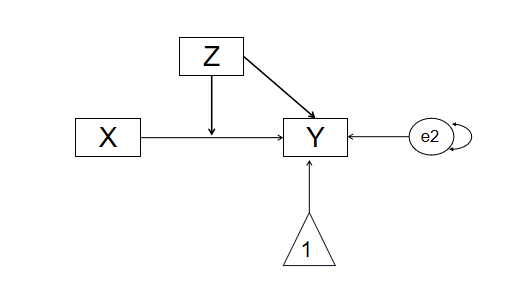

上述路径模型可以写成下面形式

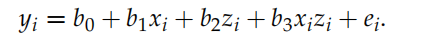

下图中y是被预测变量，x 和 z 是两个自变量，z 和 x有交互项（x*z），

b0 是截距项，e 是未被解释的残差

当交互项显著，z 可能调节 x 对 y 的效应，也可能x调节 z 对 y 的效应，究竟谁调节谁？取决于先验的理论，从我们的模型图看，应当是前者。

#### 生成交互项

使用 semTools 库生成交互项，有两种常用的方法

1. 均值中心化（mean centered）

mean center（x） = xi - mean（x）

mean center（z） = zi - mean（z）

交互项：mean center（x）*mean center（z）

2. 残差中心化（residual centered）

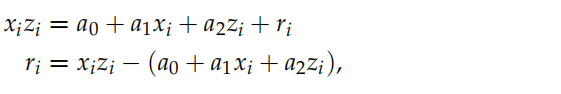

#### 为什么一定要进行中心化处理？

如果自变量和调节变量本身存在较强的共线性,那么交互项与两变量仍存在较高的共线性，共线性意味着重复的、无用的信息，共线性越高越不利于准确获取交互项的路径效应。

In [ ]:
# 生成交互项
library(semTools)

# 均值中心化
BASE <- indProd(BASE,
        var1 ="x" ,
        var2 ="z",
        meanC = TRUE )
# 残差中心化
#BASE <-indProd(BASE,
#        var1 ="x" ,
#        var2 ="z",
#        residualC = TRUE  )

In [ ]:
head(BASE)

In [ ]:
# 在lavaan中定义模型
MOD <- '
y ~ x + z + x.z
'

In [ ]:
MOD_fit <- sem(MOD,data=BASE)

In [ ]:
summary(MOD_fit,
         fit.measures = TRUE, 
         standardized = TRUE,
         modindices = TRUE, 
         rsq = TRUE)

#### 简单斜率分析

简单斜率是指在调节变量（z）特定水平下，x 对 y的预测效应，例如 z=0时，
x 对 y 的预测效应为b1，这时的b1是 z=0 时 x 对 y 的简单斜率；
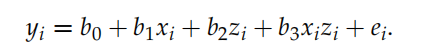

再例如，当 z=2 时，b1 + 2*b3 是此时的简单斜率。

如果没有先验的 z 的取值，一般用均值加减1标准差来计算简单斜率。




In [ ]:
# 计算此时的简单斜率
sdlower = mean(BASE$z,na.rm = T)-sd(BASE$z,na.rm = T)
sdlower
sdhigher = mean(BASE$z,na.rm = T)+sd(BASE$z,na.rm = T)
sdhigher

# 如果使用均值中心法
slotable = probe2WayMC(MOD_fit, 
           nameX=c("x","z","x.z"),
           nameY="y",
           modVar="z",
           valProbe = c( sdlower,  sdhigher          
               ))
slotable

# 如果使用残差中心法
#slotable = probe2WayRC(MOD_fit, 
#           nameX=c("x","z","x.z"),
#           nameY="y",
#           modVar="z",
#           valProbe = c( sdlower,  sdhigher          
#               ))

In [ ]:
# 画图
plotProbe(slotable,xlim=c(1,5))

## 三变量交互作用的调节效应

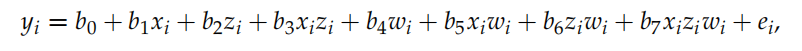

三尾交互项（three-way interaction）既可以解释为 x 与 z 的交互作用，受 w 调节， 其模型图可以表达为下图；

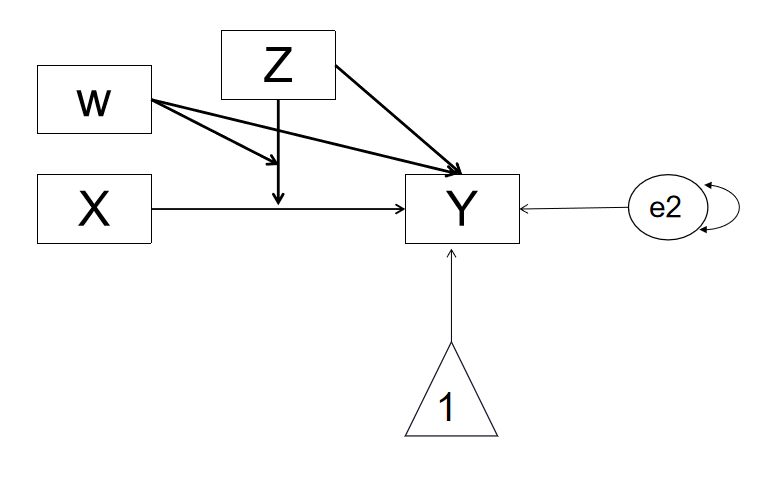

In [ ]:
# 生成交互项
library(semTools)

# 均值中心化
BASE2 = indProd(BASE,
        var1 ="x" ,
        var2 ="z",
        var3 ="w",
        meanC = TRUE )
head(BASE2)
# 残差中心化
#BASE2 = indProd(BASE,
#        var1 ="x" ,
#        var2 ="z",
#        var3 ="w",
#        residualC = TRUE  )

In [ ]:
# 在lavaan中定义模型
MOD2 <-"
y ~ x + z + w + x.z + x.w + z.w + x.z.w
" 

In [ ]:
# 估计模型
MOD2_fit <- sem(MOD2, BASE2)

In [ ]:
# 提取结果
summary(MOD2_fit,
         fit.measures = TRUE, 
         standardized = TRUE,
         modindices = TRUE, 
         rsq = TRUE)

In [ ]:
# 计算此时的简单斜率
sdlowerw = mean(BASE$w,na.rm = T)-sd(BASE$w,na.rm = T)
sdlowerw
sdhigherw = mean(BASE$w,na.rm = T)+sd(BASE$w,na.rm = T)
sdhigherw
sdlowerz = mean(BASE$z,na.rm = T)-sd(BASE$z,na.rm = T)
sdlowerz
sdhigherz = mean(BASE$z,na.rm = T)+sd(BASE$z,na.rm = T)
sdhigherz

# 如果使用均值中心法
slotable = probe3WayMC(MOD2_fit, 
                       nameX=c("x","z","w","x.z","x.w","z.w","x.z.w"),
                       nameY="y",
                       modVar=c("z","w"),
                       valProbe1 = c(sdlowerz, sdhigherz),
                       valProbe2 = c(sdlowerw, sdhigherw))
slotable

# 如果使用残差中心法
#           probe3WayRC(MOD2_fit, 
#                       nameX=c("x","z","w","x.z","x.w","z.w","x.z.w"),
#                       nameY="y",
#                       modVar=c("z","w"),
#                       valProbe1 = c(sdlowerw, sdhigherw),
#                       valProbe2 = c(sdlowerz, sdhigherz))

In [ ]:
# 画图
plotProbe(slotable,xlim=c(1,5))